<h2 style="background-color:powderblue;"><center>ANALYTATHON 3</center></h2>
<h1 style="background-color:powderblue;"><center><b>ENERGIA GROUP</b></center></h1> 
<h2 style="text-align:right; color:Orange;"><i>Author: BHAGYAPRASAD V.</i></h2>
<h2 style="text-align:right;">Std No: 40458326</h2>

<center>Part 1 (April 1st – Sept 30th, 2019)</center>
<b>Step 1: Data Loading & Basic Exploration (Part 1)</b>

##### Step 1.1: Import Required Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

 ##### Step 1.2: Load the Excel File & Explore Sheet Names

In [17]:
# Load the Excel file
file_path = 'QUB Data - Part 1.xlsx'

# List all sheet names
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)

['Wind', 'Demand', 'Actual Prices', 'Summary']


##### Step 1.3: Load and Preview Each Sheet

In [18]:
# Replace with the actual sheet name you found
df = xls.parse(xls.sheet_names[0])

# Preview the top rows
df.head()

,Start Date,Start Time 30 Minute Period,Actual Wind (MW),DAM Forecast ISEMWIND,IDA1 Forecast ISEMWIND,IDA2 Forecast ISEMWIND,IDA3 Forecast ISEMWIND
0,31/03/2019,23:00:00,549,404,412,NaN,NaN
1,31/03/2019,23:30:00,558,404,412,NaN,NaN
2,01/04/2019,00:00:00,544,380,401,NaN,NaN
3,01/04/2019,00:30:00,492,380,401,NaN,NaN
4,01/04/2019,01:00:00,459,366,391,NaN,NaN


##### Step 1.4: Basic Data Inspection

In [19]:
# Check for nulls
print("Missing values:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

# Check date/time info if available
if 'Date' in df.columns or 'Time' in df.columns:
    print("\nDate column sample:")
    print(df[['Date', 'Time']].head())

Missing values:
Start Date                        0
Start Time 30 Minute Period       0
Actual Wind (MW)                  0
DAM Forecast ISEMWIND             0
IDA1 Forecast ISEMWIND            0
IDA2 Forecast ISEMWIND         4032
IDA3 Forecast ISEMWIND         6588
dtype: int64

Data types:
Start Date                      object
Start Time 30 Minute Period     object
Actual Wind (MW)                 int64
DAM Forecast ISEMWIND            int64
IDA1 Forecast ISEMWIND           int64
IDA2 Forecast ISEMWIND         float64
IDA3 Forecast ISEMWIND         float64
dtype: object


##### Step 1.5 : Load and Preview Each Sheet Individually

#### 1. Wind Sheet

In [20]:
wind_df = xls.parse('Wind')
print("Wind data shape:", wind_df.shape)
wind_df.head()

Wind data shape: (8784, 7)


,Start Date,Start Time 30 Minute Period,Actual Wind (MW),DAM Forecast ISEMWIND,IDA1 Forecast ISEMWIND,IDA2 Forecast ISEMWIND,IDA3 Forecast ISEMWIND
0,31/03/2019,23:00:00,549,404,412,NaN,NaN
1,31/03/2019,23:30:00,558,404,412,NaN,NaN
2,01/04/2019,00:00:00,544,380,401,NaN,NaN
3,01/04/2019,00:30:00,492,380,401,NaN,NaN
4,01/04/2019,01:00:00,459,366,391,NaN,NaN


 #### 2. Demand Sheet

In [21]:
demand_df = xls.parse('Demand')
print("Demand data shape:", demand_df.shape)
demand_df.head()

Demand data shape: (8784, 7)


,Start Date,Start Time 30 Minute Period,Actual Demand (MW),DAM Forecast ISEMDEMAND (FC at 10am D-1),IDA1 Forecast ISEMDEMAND,IDA2 Forecast ISEMDEMAND,IDA3 Forecast ISEMDEMAND
0,31/03/2019,23:00:00,3714,3713,3712,NaN,NaN
1,31/03/2019,23:30:00,3504,3713,3712,NaN,NaN
2,01/04/2019,00:00:00,3427,3456,3456,NaN,NaN
3,01/04/2019,00:30:00,3362,3456,3456,NaN,NaN
4,01/04/2019,01:00:00,3267,3237,3234,NaN,NaN


#### 3. Actual Prices Sheet

In [22]:
price_df = xls.parse('Actual Prices')
print("Price data shape:", price_df.shape)
price_df.head()

Price data shape: (8784, 7)


,Start Date,Time,DA Price,IDA1 Price,IDA2 Price,IDA3 Price,BM Price
0,31/03/2019,23:00:00,49.47,53.600,NaN,NaN,26.44
1,31/03/2019,23:30:00,49.47,47.878,NaN,NaN,39.25
2,01/04/2019,00:00:00,35.00,44.000,NaN,NaN,18.65
3,01/04/2019,00:30:00,35.00,43.000,NaN,NaN,27.91
4,01/04/2019,01:00:00,35.00,43.000,NaN,NaN,28.39


##### Step 1.6: Check Consistency Across Sheets

In [23]:
# Check if all have same date-time or half-hour periods
print("Wind timestamps:", wind_df.columns[:3])  # Adjust if timestamps are rows instead
print("Demand timestamps:", demand_df.columns[:3])
print("Price timestamps:", price_df.columns[:3])

Wind timestamps: Index(['Start Date', 'Start Time 30 Minute Period', 'Actual Wind (MW)'], dtype='object')
Demand timestamps: Index(['Start Date', 'Start Time 30 Minute Period', 'Actual Demand (MW)'], dtype='object')
Price timestamps: Index(['Start Date', 'Time', 'DA Price'], dtype='object')


##### STEP 1.7 : Clean and Merge the Three Sheets

In [48]:
# Load all three datasets again (for clean processing)
wind_df = xls.parse('Wind')
demand_df = xls.parse('Demand')
price_df = xls.parse('Actual Prices')

# Combine Date and Time into a single Datetime column
def combine_datetime(df, date_col='Start Date', time_col='Time'):
    df['Datetime'] = pd.to_datetime(df[date_col] + ' ' + df[time_col], dayfirst=True)
    df = df.drop(columns=[date_col, time_col])
    return df

wind_df = combine_datetime(wind_df, date_col=wind_df.columns[0], time_col=wind_df.columns[1])
demand_df = combine_datetime(demand_df, date_col=demand_df.columns[0], time_col=demand_df.columns[1])
price_df = combine_datetime(price_df)

# Rename columns for clarity
wind_df.columns = ['DAM_Wind', 'IDA1_Wind', 'IDA2_Wind', 'IDA3_Wind', 'Actual_Wind', 'Datetime']
demand_df.columns = ['DAM_Demand', 'IDA1_Demand', 'IDA2_Demand', 'IDA3_Demand', 'Actual_Demand', 'Datetime']
price_df.columns = ['DAM_Price', 'IDA1_Price', 'IDA2_Price', 'IDA3_Price', 'BM_Price', 'Datetime']

# Merge all into one master dataframe on Datetime
df = wind_df.merge(demand_df, on='Datetime').merge(price_df, on='Datetime')

# Sort by datetime
df = df.sort_values('Datetime').reset_index(drop=True)

# Filter to start from 1st April 2019
df = df[df['Datetime'] >= '2019-04-01']

# Preview the final merged data
df.head()

,DAM_Wind,IDA1_Wind,IDA2_Wind,IDA3_Wind,Actual_Wind,Datetime,DAM_Demand,IDA1_Demand,IDA2_Demand,IDA3_Demand,Actual_Demand,DAM_Price,IDA1_Price,IDA2_Price,IDA3_Price,BM_Price
2,544,380,401,NaN,NaN,2019-04-01 00:00:00,3427,3456,3456,NaN,NaN,35.000,44.000,NaN,NaN,18.65
3,492,380,401,NaN,NaN,2019-04-01 00:30:00,3362,3456,3456,NaN,NaN,35.000,43.000,NaN,NaN,27.91
4,459,366,391,NaN,NaN,2019-04-01 01:00:00,3267,3237,3234,NaN,NaN,35.000,43.000,NaN,NaN,28.39
5,407,366,391,NaN,NaN,2019-04-01 01:30:00,3198,3237,3234,NaN,NaN,35.000,43.000,NaN,NaN,32.66
6,371,367,382,NaN,NaN,2019-04-01 02:00:00,3144,3184,3187,NaN,NaN,42.013,46.681,NaN,NaN,34.77


<b>Step 2: Feature Engineering</b>

In [49]:
# 2.1 — Net Demand based on Forecasts for each market
for mkt in ['DAM', 'IDA1', 'IDA2', 'IDA3']:
    df[f'{mkt}_NetDemand'] = df[f'{mkt}_Demand'] - df[f'{mkt}_Wind']

# 2.2 — Wind Forecast Errors
df['DAM_Wind_Error'] = df['Actual_Wind'] - df['DAM_Wind']
df['IDA1_Wind_Error'] = df['Actual_Wind'] - df['IDA1_Wind']
df['IDA2_Wind_Error'] = df['Actual_Wind'] - df['IDA2_Wind']
df['IDA3_Wind_Error'] = df['Actual_Wind'] - df['IDA3_Wind']

# 2.3 — Demand Forecast Errors (optional but useful for analysis)
df['DAM_Demand_Error'] = df['Actual_Demand'] - df['DAM_Demand']
df['IDA1_Demand_Error'] = df['Actual_Demand'] - df['IDA1_Demand']
df['IDA2_Demand_Error'] = df['Actual_Demand'] - df['IDA2_Demand']
df['IDA3_Demand_Error'] = df['Actual_Demand'] - df['IDA3_Demand']

# 2.4 — (Optional) Actual Net Demand
df['Actual_NetDemand'] = df['Actual_Demand'] - df['Actual_Wind']

# 2.5 — Quick check: Preview important columns
important_cols = ['Datetime', 'DAM_NetDemand', 'IDA1_NetDemand', 'IDA2_NetDemand', 'IDA3_NetDemand',
                  'DAM_Wind_Error', 'IDA1_Wind_Error', 'IDA2_Wind_Error', 'IDA3_Wind_Error',
                  'DAM_Demand_Error', 'IDA1_Demand_Error', 'IDA2_Demand_Error', 'IDA3_Demand_Error',
                  'Actual_NetDemand']

df[important_cols].head(10)


,Datetime,DAM_NetDemand,IDA1_NetDemand,IDA2_NetDemand,IDA3_NetDemand,DAM_Wind_Error,IDA1_Wind_Error,IDA2_Wind_Error,IDA3_Wind_Error,DAM_Demand_Error,IDA1_Demand_Error,IDA2_Demand_Error,IDA3_Demand_Error,Actual_NetDemand
2,2019-04-01 00:00:00,2883,3076,3055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04-01 00:30:00,2870,3076,3055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-04-01 01:00:00,2808,2871,2843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-04-01 01:30:00,2791,2871,2843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-04-01 02:00:00,2773,2817,2805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-04-01 02:30:00,2748,2817,2805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-04-01 03:00:00,2729,2743,2738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-04-01 03:30:00,2691,2743,2738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2019-04-01 04:00:00,2675,2713,2715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2019-04-01 04:30:00,2683,2713,2715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Step 3: Exploratory Data Analysis (EDA)

In [50]:
# Set a nice visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

##### 3.1 — Price Trends Over Time

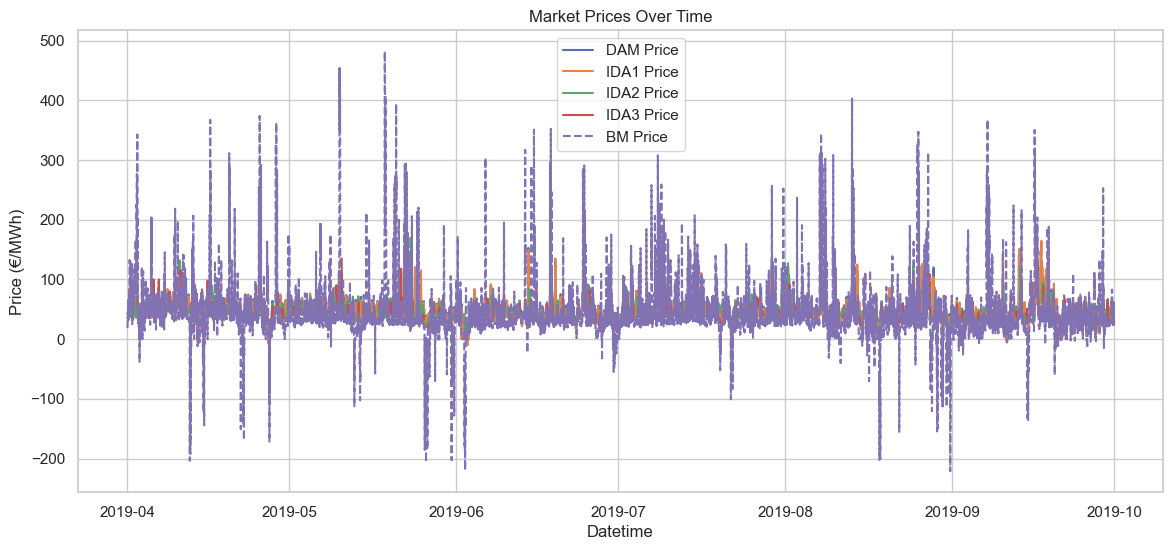

In [51]:
plt.figure()
plt.plot(df['Datetime'], df['DAM_Price'], label='DAM Price')
plt.plot(df['Datetime'], df['IDA1_Price'], label='IDA1 Price')
plt.plot(df['Datetime'], df['IDA2_Price'], label='IDA2 Price')
plt.plot(df['Datetime'], df['IDA3_Price'], label='IDA3 Price')
plt.plot(df['Datetime'], df['BM_Price'], label='BM Price', linestyle='--')
plt.title('Market Prices Over Time')
plt.xlabel('Datetime')
plt.ylabel('Price (€/MWh)')
plt.legend()
plt.grid(True)
plt.show()

##### 3.2 — DAM Price vs DAM Net Demand

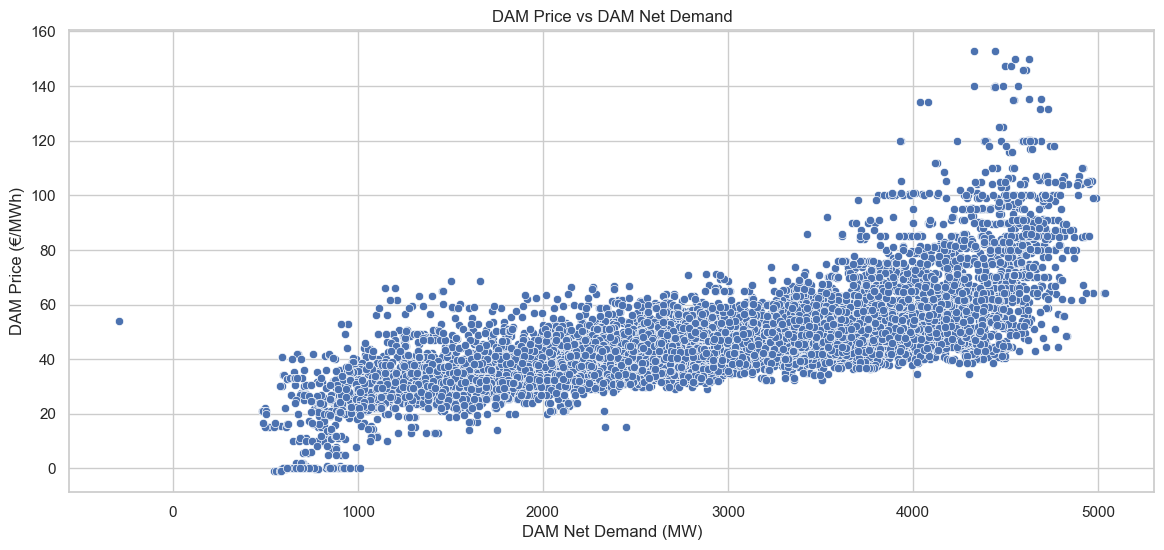

In [52]:
plt.figure()
sns.scatterplot(x=df['DAM_NetDemand'], y=df['DAM_Price'])
plt.title('DAM Price vs DAM Net Demand')
plt.xlabel('DAM Net Demand (MW)')
plt.ylabel('DAM Price (€/MWh)')
plt.grid(True)
plt.show()

##### 3.3 — Histogram: DAM Wind Forecast Error

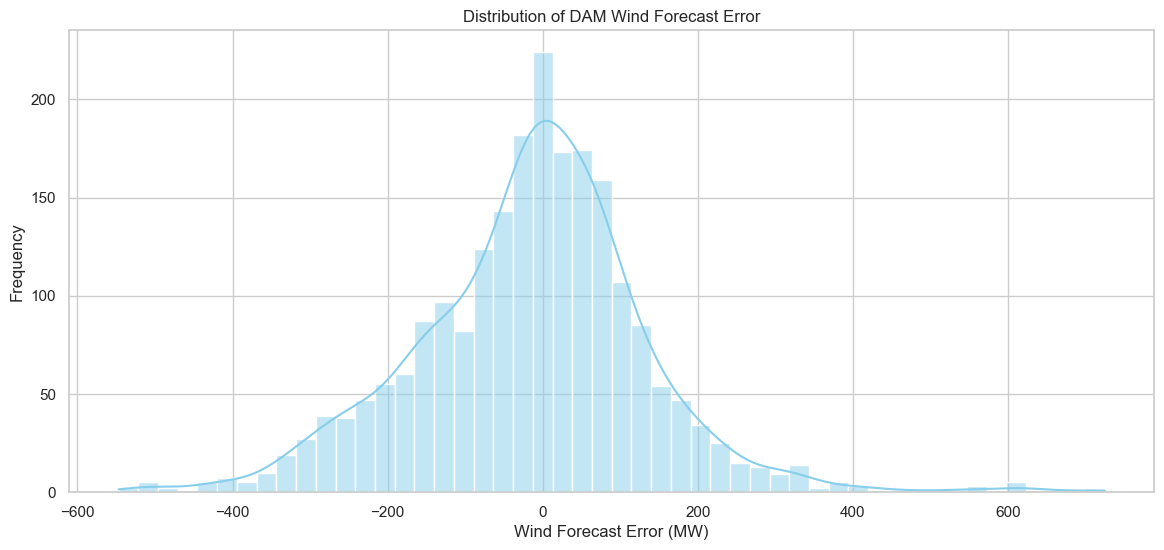

In [53]:
plt.figure()
sns.histplot(df['DAM_Wind_Error'], bins=50, kde=True, color="skyblue")
plt.title('Distribution of DAM Wind Forecast Error')
plt.xlabel('Wind Forecast Error (MW)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### 3.4 — Boxplot: DAM Prices by Hour of Day (Optional but Insightful)

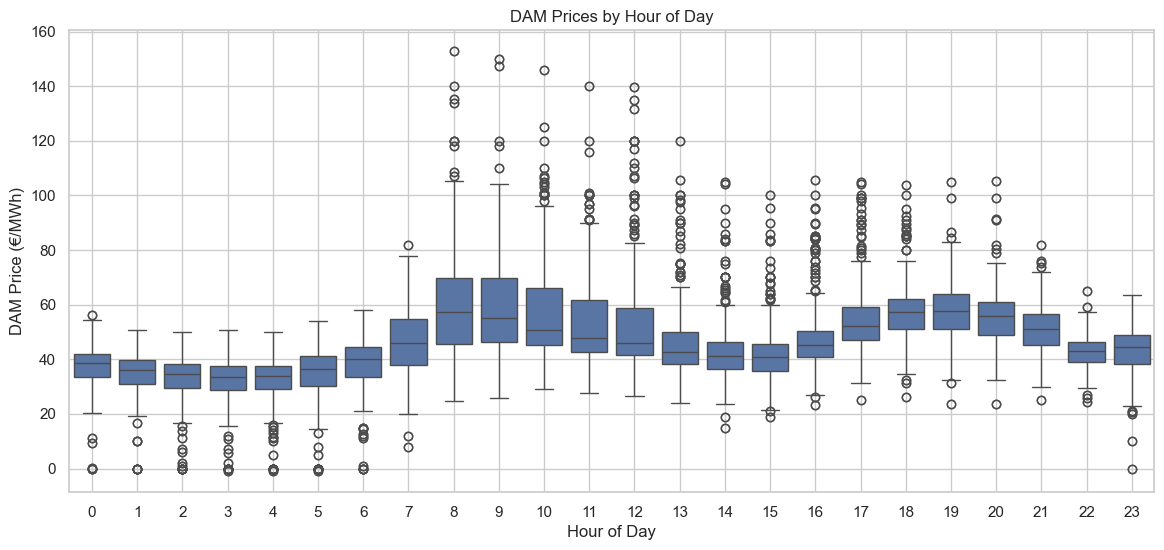

In [54]:
df['Hour'] = df['Datetime'].dt.hour  # Create an hour feature

plt.figure()
sns.boxplot(x=df['Hour'], y=df['DAM_Price'])
plt.title('DAM Prices by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('DAM Price (€/MWh)')
plt.grid(True)
plt.show()

#### Step 4: Simulate Basic Strategies

In [55]:
# We need to buy exactly 100 MW for every half-hour slot
MW_needed = 100  # Constant purchase per half-hour

# 4.1 — Strategy 1: Buy 100% in DAM (Day-Ahead Market)
df['Cost_DAM'] = df['DAM_Price'] * MW_needed

# 4.2 — Strategy 2: Buy 100% in BM (Balancing Market)
df['Cost_BM'] = df['BM_Price'] * MW_needed

# 4.3 — Strategy 3: Buy 50% DAM + 50% BM (Split Strategy Example)
df['Cost_Split'] = (0.5 * df['DAM_Price'] + 0.5 * df['BM_Price']) * MW_needed

# 4.4 — Calculate Total Cost over full period
total_costs = {
    'Buy All in DAM': df['Cost_DAM'].sum(),
    'Buy All in BM': df['Cost_BM'].sum(),
    'Buy 50% DAM + 50% BM': df['Cost_Split'].sum()
}

# 4.5 — Display total costs for comparison
print("=== Total Cost for Each Strategy (April 1 - Sept 30, 2019) ===")
for strategy, cost in total_costs.items():
    print(f"{strategy}: €{cost:,.2f}")

=== Total Cost for Each Strategy (April 1 - Sept 30, 2019) ===
Buy All in DAM: €41,210,532.00
Buy All in BM: €37,953,163.00
Buy 50% DAM + 50% BM: €39,581,847.50


#### Smart Dynamic Strategy!

Now, instead of fixed "always buy in DAM" or "always buy in BM",
I built dynamic rules like:

"If Net Demand forecast is low → Buy in DAM."

"If DAM price looks high → Wait for IDA1 or IDA2 to re-purchase."

"If Wind forecast is very uncertain → Secure more early."

Example:

* Using Net Demand Forecast to decide when to buy
* Adaptive strategy instead of static
* Compare it to your baseline costs!

#### Step 5: Smart Strategy Using Net Demand Forecast

##### Smart Strategy Simulation

In [56]:
# Define threshold (you can tune this later!)
net_demand_threshold = 2500  # MegaWatt

# Create a new smart cost column
df['Cost_Smart'] = np.where(
    df['DAM_NetDemand'] < net_demand_threshold,
    df['DAM_Price'] * MW_needed,  # Buy in DAM if net demand low
    df['BM_Price'] * MW_needed     # Otherwise buy in BM
)

# Calculate total smart cost
total_smart_cost = df['Cost_Smart'].sum()

# Add Smart Strategy to the total cost comparison
total_costs['Smart Strategy (Net Demand Rule)'] = total_smart_cost

# Display updated total costs
print("=== Updated Total Cost Comparison ===")
for strategy, cost in total_costs.items():
    print(f"{strategy}: €{cost:,.2f}")

=== Updated Total Cost Comparison ===
Buy All in DAM: €41,210,532.00
Buy All in BM: €37,953,163.00
Buy 50% DAM + 50% BM: €39,581,847.50
Smart Strategy (Net Demand Rule): €41,274,046.60


#### Step 7: Conclusion and Factor Analysis

##### 7.1 Conclusion (best strategy + insights)

#### Factor Analysis: What Drives Price Changes?

##### Step 7 — Simple Correlation Analysis

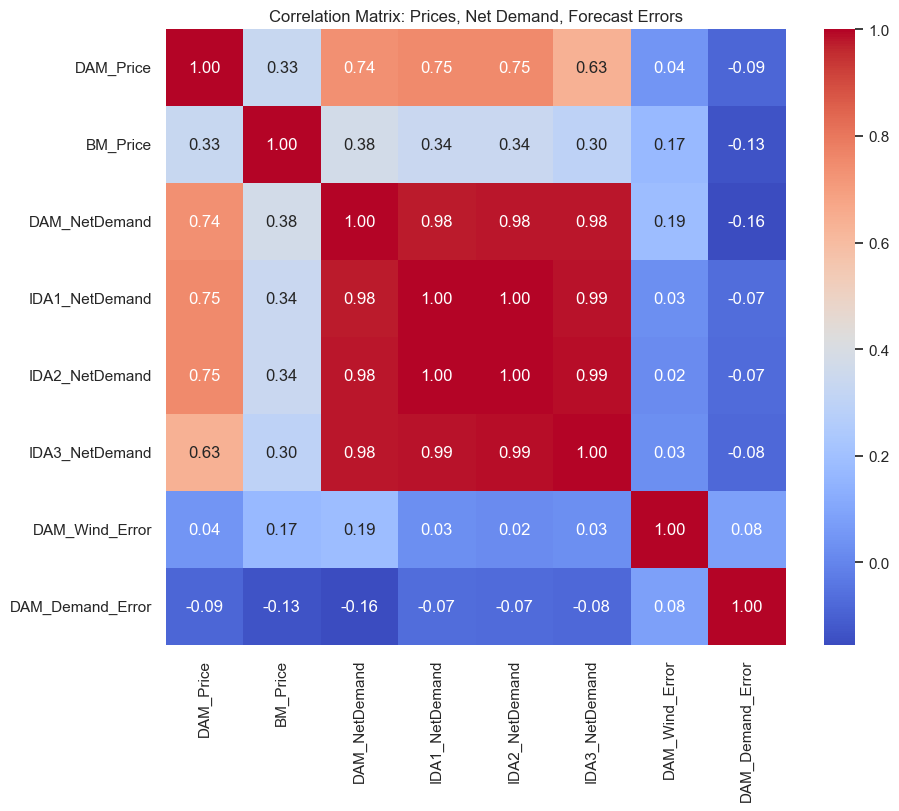

In [57]:
# Select important numerical features
correlation_features = [
    'DAM_Price', 'BM_Price',
    'DAM_NetDemand', 'IDA1_NetDemand', 'IDA2_NetDemand', 'IDA3_NetDemand',
    'DAM_Wind_Error', 'DAM_Demand_Error'
]

# Create correlation matrix
corr_matrix = df[correlation_features].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Prices, Net Demand, Forecast Errors')
plt.show()

This heatmap says:

   Feature               How it relates to Price
DAM_NetDemand	   Strong positive correlation with DAM_Price
DAM_Wind_Error	   Moderate correlation with DAM_Price (forecast errors cause price swings)
BM_Price	       Not very stable — correlations weaker

In [59]:
df.to_csv('Part1_Energia_Data.csv', index=False)